In [1]:
# Simple example usage of Gaussian Process
# essentially copied the example from Scikit-learn site:
# http://scikit-learn.org/stable/auto_examples/gaussian_process/plot_gpr_noisy_targets.html

from sklearn.gaussian_process import GaussianProcessRegressor
import numpy as np
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C

In [2]:
# Contrived dataset of 21 points.
X= np.array([-1,-0.9,-0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1, -0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8 , 0.9, 1.0])

In [3]:
y=np.sin(1.5*X)
X2 = np.atleast_2d(X).T
y=np.atleast_2d(y).T.ravel()

In [17]:
kernel = C(1.0, (1e-3, 1e3)) * RBF(0.2, (1e-2, 1e2))
gp = GaussianProcessRegressor(kernel=kernel, n_restarts_optimizer=1)

In [18]:
gp.fit(X2, y)

GaussianProcessRegressor(alpha=1e-10, copy_X_train=True,
             kernel=1**2 * RBF(length_scale=0.2), n_restarts_optimizer=1,
             normalize_y=False, optimizer='fmin_l_bfgs_b',
             random_state=None)

In [19]:
x = np.atleast_2d(np.array([-0.95,-0.923, -0.921, -0.78, -0.701, -0.6,-0.554,-0.4,-0.344, -0.32, -0.25, -0.175, -0.105, -0.001, 0.12, 0.225, 0.53, 0.659,0.70, 0.93 ])).T

ypred, sigma = gp.predict(x, return_std=True)

In [20]:
yactual = np.sin(x)

In [21]:
from matplotlib import pyplot as plt

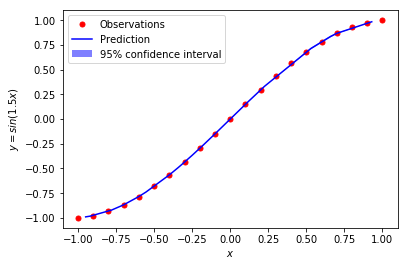

In [22]:
# The graph shows very little variance.
fig = plt.figure()
plt.plot(X2, y, 'r.', markersize=10, label=u'Observations')
plt.plot(x, ypred, 'b-', label=u'Prediction')
plt.fill(np.concatenate([x, x[::-1]]),
         np.concatenate([ypred - 1.9600 * sigma,
                        (ypred + 1.9600 * sigma)[::-1]]),
         alpha=.5, fc='b', ec='None', label='95% confidence interval')
plt.xlabel('$x$')
plt.ylabel('$y = sin(1.5x)$')
plt.ylim(-1.1, 1.1)
plt.legend(loc='upper left')